In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report



In [4]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


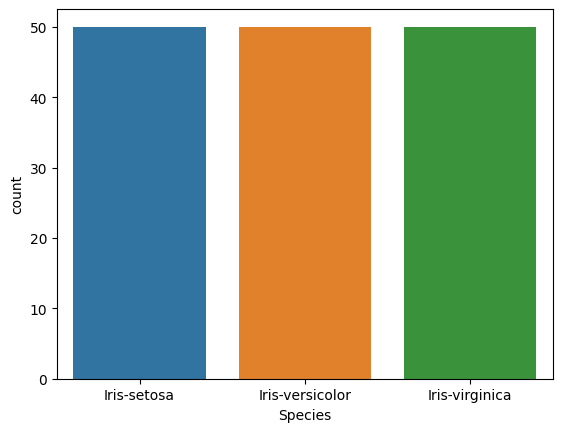

In [7]:
##Distribution of target
sns.countplot(data=data, x='Species')
plt.show()

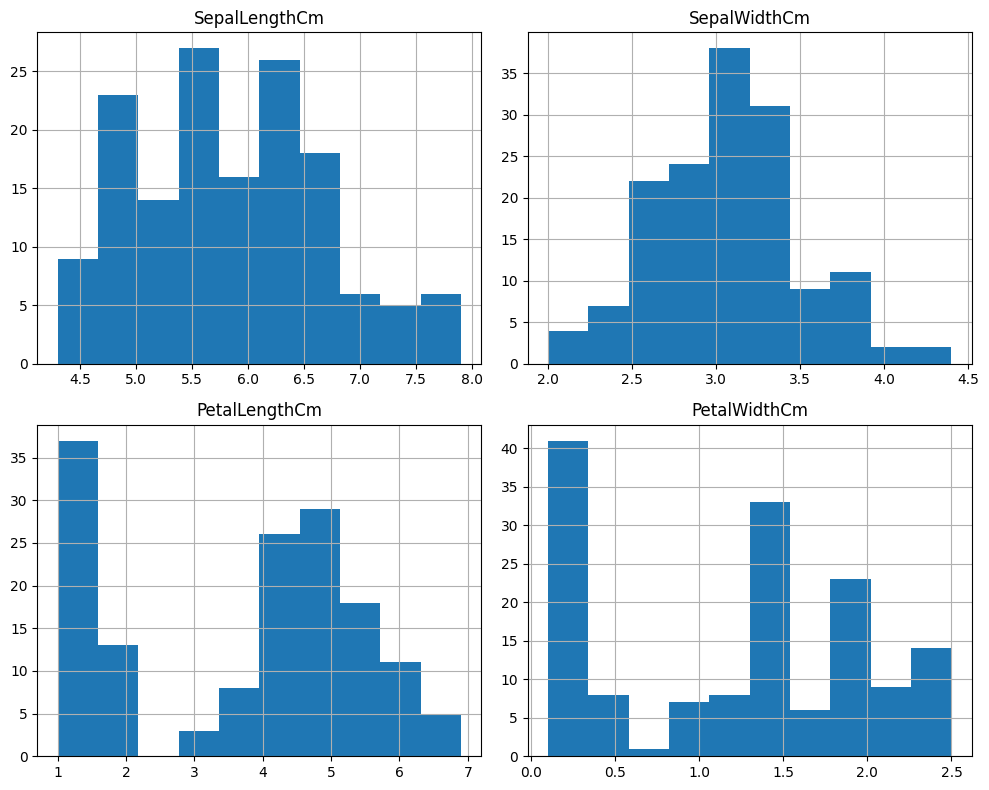

In [8]:
# Univariate Analysis
data.drop('Id',axis=1).hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

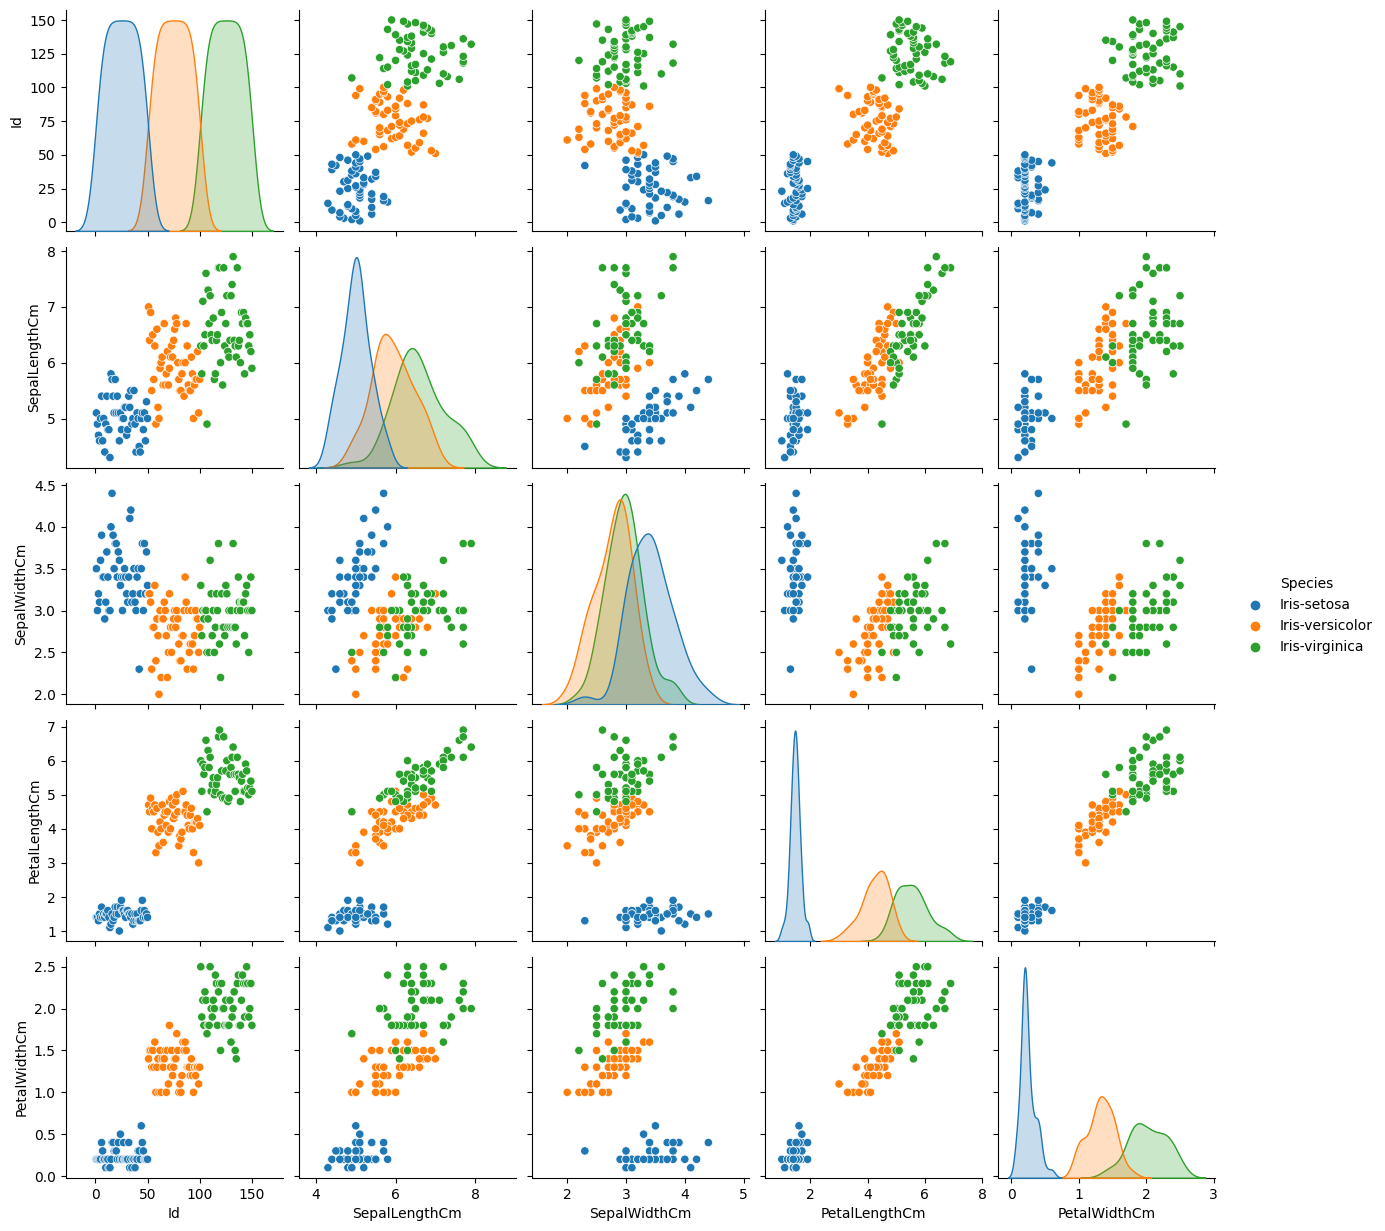

In [9]:
# Bivariate Analysis
sns.pairplot(data, hue='Species')
plt.show()

## Model Building

In [10]:
# Train/Test Split
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

model = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores
train_scores = []
test_scores = []

# Perform k-fold splitting and training
for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on training set
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    
    # Evaluate on validation set
    test_score = model.score(X_val, y_val)
    test_scores.append(test_score)

In [11]:
# Print accuracy scores
print("Train set accuracy scores:", train_scores)
print("Mean train set accuracy:", sum(train_scores) / len(train_scores))
print("\nValidation set accuracy scores:", test_scores)
print("Mean validation set accuracy:", sum(test_scores) / len(test_scores))

Train set accuracy scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean train set accuracy: 1.0

Validation set accuracy scores: [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
Mean validation set accuracy: 0.9533333333333335


## Plotting Tree

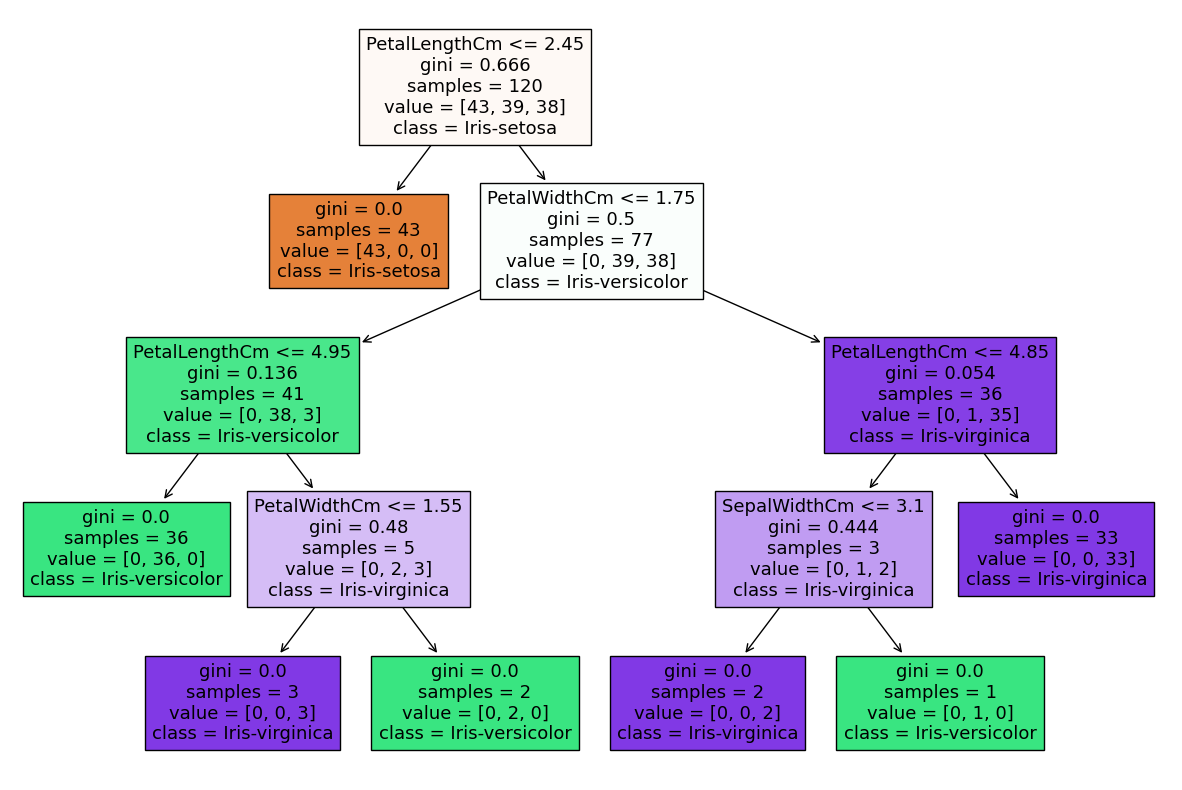

In [13]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

## Evaluation

The perfect train set accuracy scores of 1.0 for each fold indicate that the Decision Tree model achieved 100% accuracy on each training split. This might suggest that the model might have overfit the training data as it perfectly learned the patterns in each fold.

The validation set accuracy scores are slightly lower than the training set, but still relatively high and consistent across the folds (ranging from 93.33% to 100%). This indicates that the model generalizes well on unseen data, as it maintains high accuracy on validation sets, suggesting a good performance and robustness.

Overall, the results indicate that the Decision Tree classifier performs exceptionally well on this dataset, achieving high accuracy on both the training and validation sets. However, it's essential to further validate the model's performance on an independent test set to ensure its generalization capabilities.